#**Exercício - Aula 2**

Dado o dataset de produtos [1], você deverá desenvolver diferentes modelos para classificação de textos, envolvendo cenários diferentes. O dataset utilizado será o de classificação de produtos, utilizado na aula anterior.

[1] - https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv

Obs.: em todos os modelos use:
- Remoção dos registros com valores faltantes
- criem uma nova coluna concatenando as colunas nome e descrição.
- randon_state igual a 42 para permitir a comparação com seus colegas e separe uma amostra de 30% para teste.
- Nas partes 1 e 2, utilize sempre o mesmo algorítmo de classificação.
- Para avaliação de resultados, sempre apresente o relatório de classificação e a matriz de confusão


### Parte 1 - Diferentes tipos de vetorização sem processos de limpeza de texto

Nesta parte você deverá aplicar apenas as seguintes técnicas:

1. Remoção de pontuação
2. Lowercasing
3. Vetorização

A partir daí, crie 3 datasets: BOW, TF e TF-IDF e treine um modelo de classificação para cada caso.

Avalie os resultados comparando a performance de cada modelo e apresente suas conclusões

### Parte 2 - Diferentes tipos de vetorização com um processo completo de normalização

Nesta parte você deverá fazer uma exploração do dataset e aplicar as técnicas de normalização que julgar que trarão o melhor resultado na modelagem.

A partir daí, crie 3 datasets: BOW, TF e TF-IDF e treine um modelo de classificação para cada caso.

Avalie os resultados comparando a performance de cada modelo e apresente suas conclusões. Em suas análises, considere também os resultados obtidos na parte 1

### Parte 3 (Extra) - Diferentes algorítmos de classificação

Nesta parte você deverá selecionar um dos datasets criados na parte 2 (justifique) e treinar 3 modelos de classificação utilizando diferentes algorítmos. Seguem algumas sugestões de algorítimos:

- Regressão Logistica (LogisticRegression)
- Random Forest (RandomForestClassifier)
- Naive Bayes (MultinomialNB e BernoulliNB)


Avalie os resultados comparando a performance de cada modelo e apresente suas conclusões.

### Parte 4 (Extra) - word2vec

Você deverá treinar o modelo de classificação do dataset de produtos utilizando a abordagem de classificação com word2vec pela representação do vetor médio.



## **Parte 1**

In [1]:
# Pacotes utilizados
import pandas as pd
from sklearn.model_selection import train_test_split

# carregar dataframe
df = pd.read_csv("https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv", delimiter=";", encoding='utf-8')

# limpeza inicial (normalização)
df.dropna(inplace=True)
df["texto"] = df['nome'] + " " + df['descricao']

# divisão da amostra entre treino e teste
df_train, df_test = train_test_split(
      df,
      test_size = 0.3,
      random_state = 42
  )

In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Remover pontuações e aplicar lowercasing
def preprocess_text(text):
    text = text.lower()  # Lowercasing
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])  # Remoção de pontuação
    return text

# Aplicando tratamento aos datasets de treino e teste
df_train['texto'] = df_train['texto'].apply(preprocess_text)
df_test['texto'] = df_test['texto'].apply(preprocess_text)

# Vetorização usando BOW
vectorizer_bow = CountVectorizer()
X_train_bow = vectorizer_bow.fit_transform(df_train['texto'])
X_test_bow = vectorizer_bow.transform(df_test['texto'])

# Vetorização usando TF
vectorizer_tf = TfidfVectorizer(use_idf=False)
X_train_tf = vectorizer_tf.fit_transform(df_train['texto'])
X_test_tf = vectorizer_tf.transform(df_test['texto'])

# Vetorização usando TF-IDF
vectorizer_tfidf = TfidfVectorizer()
X_train_tfidf = vectorizer_tfidf.fit_transform(df_train['texto'])
X_test_tfidf = vectorizer_tfidf.transform(df_test['texto'])

# Treinamento dos modelos
model_bow = MultinomialNB()
model_bow.fit(X_train_bow, df_train['categoria'])
pred_bow = model_bow.predict(X_test_bow)

model_tf = MultinomialNB()
model_tf.fit(X_train_tf, df_train['categoria'])
pred_tf = model_tf.predict(X_test_tf)

model_tfidf = MultinomialNB()
model_tfidf.fit(X_train_tfidf, df_train['categoria'])
pred_tfidf = model_tfidf.predict(X_test_tfidf)

# Avaliação dos resultados
acc_bow = accuracy_score(df_test['categoria'], pred_bow)
acc_tf = accuracy_score(df_test['categoria'], pred_tf)
acc_tfidf = accuracy_score(df_test['categoria'], pred_tfidf)

#Comparação de performance
print("Acurácia BOW:", acc_bow)
print("Acurácia TF:", acc_tf)
print("Acurácia TF-IDF:", acc_tfidf)

#Relatório de Classificação
print("\nRelatório de Classificação BOW:\n", classification_report(df_test['categoria'], pred_bow))
print("\nRelatório de Classificação TF:\n", classification_report(df_test['categoria'], pred_tf))
print("\nRelatório de Classificação TF-IDF:\n", classification_report(df_test['categoria'], pred_tfidf))

# Função para plotar matriz de confusão
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.title('Matriz de Confusão')
    plt.show()

Acurácia BOW: 0.9794285714285714
Acurácia TF: 0.9348571428571428
Acurácia TF-IDF: 0.9645714285714285

Relatório de Classificação BOW:
               precision    recall  f1-score   support

   brinquedo       0.99      0.95      0.97       190
        game       0.95      0.99      0.97       194
       livro       0.99      0.97      0.98       261
   maquiagem       0.99      1.00      0.99       230

    accuracy                           0.98       875
   macro avg       0.98      0.98      0.98       875
weighted avg       0.98      0.98      0.98       875


Relatório de Classificação TF:
               precision    recall  f1-score   support

   brinquedo       0.99      0.82      0.89       190
        game       0.91      0.92      0.92       194
       livro       0.89      0.98      0.93       261
   maquiagem       0.98      1.00      0.99       230

    accuracy                           0.93       875
   macro avg       0.94      0.93      0.93       875
weighted avg     

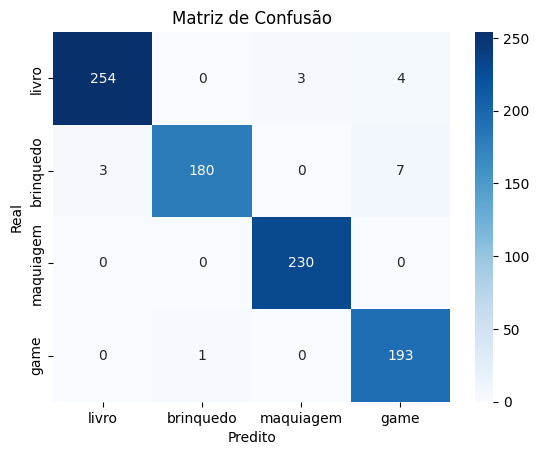

In [3]:
# Matriz de confusão para BOW
plot_confusion_matrix(df_test['categoria'], pred_bow, labels=df['categoria'].unique())

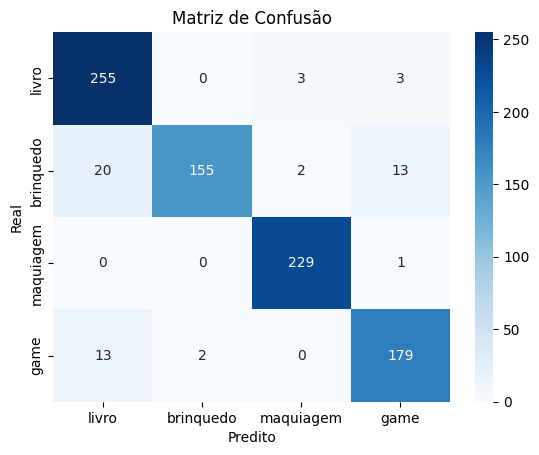

In [4]:
# Matriz de confusão para TF
plot_confusion_matrix(df_test['categoria'], pred_tf, labels=df['categoria'].unique())

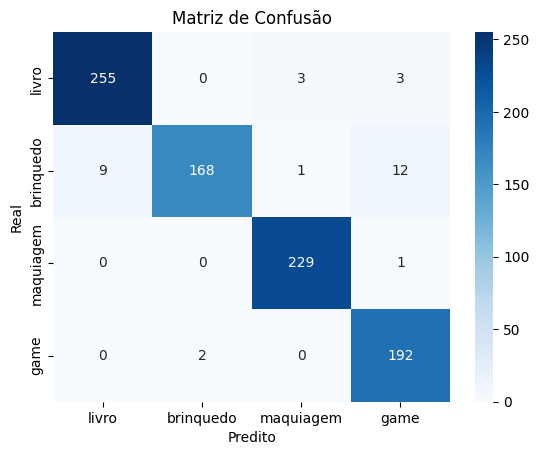

In [5]:
# Matriz de confusão para TF-IDF
plot_confusion_matrix(df_test['categoria'], pred_tfidf, labels=df['categoria'].unique())

## **Parte 2**

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import strip_accents_ascii
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfTransformer
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer  # português
from nltk.tokenize import word_tokenize

# Download dos recursos do NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('rslp')

# Remoção de Stop Words e aplicação de outras técnicas de normalização
stop_words = set(stopwords.words('portuguese'))

# Função para remoção de stop words, stemming e remoção de palavras muito frequentes/muito raras
def preprocess_text_advanced(text, df):
    stop_words = set(stopwords.words('portuguese'))
    stemmer = RSLPStemmer()

    # Tokenização
    words = word_tokenize(text)

    # Remoção de stop words
    words = [word for word in words if word.lower() not in stop_words]

    # Stemming
    words = [stemmer.stem(word) for word in words]

    # Remoção de palavras muito frequentes novamente se necessário
    freq_words = pd.Series(' '.join(df['texto']).split()).value_counts()
    rare_words = freq_words[freq_words <= 5].index
    words = [word for word in words if word not in rare_words]

    return ' '.join(words)

# Aplicar preprocess_text_advanced aos datasets de treino e teste
df_train['texto_normalized_advanced'] = df_train['texto'].apply(lambda x: preprocess_text_advanced(x, df_train))
df_test['texto_normalized_advanced'] = df_test['texto'].apply(lambda x: preprocess_text_advanced(x, df_test))

# Vetorização usando BOW com pipeline para normalização
pipeline_bow_advanced = Pipeline([
    ('vect', CountVectorizer(strip_accents=strip_accents_ascii)),
    ('clf', MultinomialNB())
])

# Vetorização usando TF com pipeline para normalização
pipeline_tf_advanced = Pipeline([
    ('vect', TfidfVectorizer(use_idf=False, strip_accents=strip_accents_ascii)),
    ('clf', MultinomialNB())
])

# Vetorização usando TF-IDF com pipeline para normalização
pipeline_tfidf_advanced = Pipeline([
    ('vect', TfidfVectorizer(strip_accents=strip_accents_ascii)),
    ('clf', MultinomialNB())
])

# Parâmetros para Grid Search
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'vect__min_df': [1, 2, 3],
}

# Busca em grade para BOW
grid_search_bow_advanced = GridSearchCV(pipeline_bow_advanced, parameters, n_jobs=-1, verbose=1)
grid_search_bow_advanced.fit(df_train['texto_normalized_advanced'], df_train['categoria'])
pred_bow_advanced = grid_search_bow_advanced.predict(df_test['texto_normalized_advanced'])

# Busca em grade para TF
grid_search_tf_advanced = GridSearchCV(pipeline_tf_advanced, parameters, n_jobs=-1, verbose=1)
grid_search_tf_advanced.fit(df_train['texto_normalized_advanced'], df_train['categoria'])
pred_tf_advanced = grid_search_tf_advanced.predict(df_test['texto_normalized_advanced'])

# Busca em grade para TF-IDF
grid_search_tfidf_advanced = GridSearchCV(pipeline_tfidf_advanced, parameters, n_jobs=-1, verbose=1)
grid_search_tfidf_advanced.fit(df_train['texto_normalized_advanced'], df_train['categoria'])
pred_tfidf_advanced = grid_search_tfidf_advanced.predict(df_test['texto_normalized_advanced'])

# Avaliação dos resultados após normalização
acc_bow_advanced = accuracy_score(df_test['categoria'], pred_bow_advanced)
acc_tf_advanced = accuracy_score(df_test['categoria'], pred_tf_advanced)
acc_tfidf_advanced = accuracy_score(df_test['categoria'], pred_tfidf_advanced)

print("Acurácia BOW (com normalização avançada):", acc_bow_advanced)
print("Acurácia TF (com normalização avançada):", acc_tf_advanced)
print("Acurácia TF-IDF (com normalização avançada):", acc_tfidf_advanced)

print("\nRelatório de Classificação BOW (com normalização avançada):\n", classification_report(df_test['categoria'], pred_bow_advanced))
print("\nRelatório de Classificação TF (com normalização avançada):\n", classification_report(df_test['categoria'], pred_tf_advanced))
print("\nRelatório de Classificação TF-IDF (com normalização avançada):\n", classification_report(df_test['categoria'], pred_tfidf_advanced))

# Cria uma nova coluna 'texto_normalized' no DataFrame
df_train['texto_normalized'] = df_train['texto'].apply(preprocess_text)
df_test['texto_normalized'] = df_test['texto'].apply(preprocess_text)

# Vetorização usando BOW com pipeline para normalização
pipeline_bow = Pipeline([
    ('vect', CountVectorizer(stop_words=stop_words, strip_accents=strip_accents_ascii)),
    ('clf', MultinomialNB())
])

# Vetorização usando TF com pipeline para normalização
pipeline_tf = Pipeline([
    ('vect', TfidfVectorizer(use_idf=False, stop_words=stop_words, strip_accents=strip_accents_ascii)),
    ('clf', MultinomialNB())
])

# Vetorização usando TF-IDF com pipeline para normalização
pipeline_tfidf = Pipeline([
    ('vect', TfidfVectorizer(stop_words=stop_words, strip_accents=strip_accents_ascii)),
    ('clf', MultinomialNB())
])

# Parâmetros para Grid Search
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'vect__min_df': [1, 2, 3],
}

# Busca em grade para BOW
grid_search_bow_advanced = GridSearchCV(pipeline_bow_advanced, parameters, n_jobs=-1, verbose=1)
grid_search_bow_advanced.fit(df_train['texto_normalized_advanced'], df_train['categoria'])
pred_bow_advanced = grid_search_bow_advanced.predict(df_test['texto_normalized_advanced'])

# Busca em grade para TF
grid_search_tf_advanced = GridSearchCV(pipeline_tf_advanced, parameters, n_jobs=-1, verbose=1)
grid_search_tf_advanced.fit(df_train['texto_normalized_advanced'], df_train['categoria'])
pred_tf_advanced = grid_search_tf_advanced.predict(df_test['texto_normalized_advanced'])

# Busca em grade para TF-IDF
grid_search_tfidf_advanced = GridSearchCV(pipeline_tfidf_advanced, parameters, n_jobs=-1, verbose=1)
grid_search_tfidf_advanced.fit(df_train['texto_normalized_advanced'], df_train['categoria'])
pred_tfidf_advanced = grid_search_tfidf_advanced.predict(df_test['texto_normalized_advanced'])

# Avaliação dos resultados após normalização
acc_bow_advanced = accuracy_score(df_test['categoria'], pred_bow_advanced)
acc_tf_normalized = accuracy_score(df_test['categoria'], pred_tf_advanced)
acc_tfidf_normalized = accuracy_score(df_test['categoria'], pred_tfidf_advanced)

print("Acurácia BOW (com normalização avançada):", acc_bow_advanced)
print("Acurácia TF (com normalização avançada):", acc_tf_normalized)
print("Acurácia TF-IDF (com normalização avançada):", acc_tfidf_normalized)

print("\nRelatório de Classificação BOW (com normalização avançada):\n", classification_report(df_test['categoria'], pred_bow_advanced))
print("\nRelatório de Classificação TF (com normalização avançada):\n", classification_report(df_test['categoria'], pred_tf_advanced))
print("\nRelatório de Classificação TF-IDF (com normalização avançada):\n", classification_report(df_test['categoria'], pred_tfidf_advanced))



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Acurácia BOW (com normalização avançada): 0.9782857142857143
Acurácia TF (com normalização avançada): 0.9702857142857143
Acurácia TF-IDF (com normalização avançada): 0.9737142857142858

Relatório de Classificação BOW (com normalização avançada):
               precision    recall  f1-score   support

   brinquedo       1.00      0.93      0.96       190
        game       0.95      1.00      0.97       194
       livro       0.98      0.98      0.98       261
   maquiagem       0.98      1.00      0.99       230

    accuracy                           0.98       875
   macro avg       0.98      0.98      0.98       875
weighted avg       0.98      0.98      0.98       875


Relatório de Classificação TF (com normalização avançada):
               precision    recall  f1-score   support

   brinquedo       0.9

## **Parte 3 (Extra)**

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

X_train_text = df_train['texto_normalized_advanced']
X_test_text = df_test['texto_normalized_advanced']

# Vetorização usando TF-IDF
vectorizer = TfidfVectorizer(strip_accents=strip_accents_ascii)
X_train_tfidf = vectorizer.fit_transform(X_train_text)
X_test_tfidf = vectorizer.transform(X_test_text)

# Modelos
logistic_model = LogisticRegression()
random_forest_model = RandomForestClassifier()
naive_bayes_model = MultinomialNB()

# Treinamento dos modelos
logistic_model.fit(X_train_tfidf, df_train['categoria'])
random_forest_model.fit(X_train_tfidf, df_train['categoria'])
naive_bayes_model.fit(X_train_tfidf, df_train['categoria'])

# Previsões
pred_logistic = logistic_model.predict(X_test_tfidf)
pred_random_forest = random_forest_model.predict(X_test_tfidf)
pred_naive_bayes = naive_bayes_model.predict(X_test_tfidf)

# Avaliação dos resultados
acc_logistic = accuracy_score(df_test['categoria'], pred_logistic)
acc_random_forest = accuracy_score(df_test['categoria'], pred_random_forest)
acc_naive_bayes = accuracy_score(df_test['categoria'], pred_naive_bayes)

print("Acurácia Regressão Logística:", acc_logistic)
print("Acurácia Random Forest:", acc_random_forest)
print("Acurácia Naive Bayes:", acc_naive_bayes)

print("\nRelatório de Classificação Regressão Logística:\n", classification_report(df_test['categoria'], pred_logistic))
print("\nRelatório de Classificação Random Forest:\n", classification_report(df_test['categoria'], pred_random_forest))
print("\nRelatório de Classificação Naive Bayes:\n", classification_report(df_test['categoria'], pred_naive_bayes))


Acurácia Regressão Logística: 0.984
Acurácia Random Forest: 0.9851428571428571
Acurácia Naive Bayes: 0.9714285714285714

Relatório de Classificação Regressão Logística:
               precision    recall  f1-score   support

   brinquedo       0.97      0.97      0.97       190
        game       0.97      0.98      0.97       194
       livro       0.99      0.99      0.99       261
   maquiagem       1.00      1.00      1.00       230

    accuracy                           0.98       875
   macro avg       0.98      0.98      0.98       875
weighted avg       0.98      0.98      0.98       875


Relatório de Classificação Random Forest:
               precision    recall  f1-score   support

   brinquedo       0.98      0.96      0.97       190
        game       0.99      0.99      0.99       194
       livro       0.99      0.98      0.98       261
   maquiagem       0.98      1.00      0.99       230

    accuracy                           0.99       875
   macro avg       0.99  

Analisando os resultados é possivel verificar que as métricas dos 3 modelos ficaram muito próximas.

# **Parte 4 (Extra)**

In [12]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from nltk.tokenize import word_tokenize
import nltk

# Tokenização
tokenized_text = [word_tokenize(text.lower()) for text in df_train['texto']]

# Treinamento do modelo Word2Vec
word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

# Função para obter o vetor médio do documento
def get_doc_vector(tokens, model, vector_size):
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if not vectors:
        return [0] * vector_size
    return list(pd.DataFrame(vectors).mean())

# Aplicar a função para obter vetores médios nos conjuntos de treino e teste
df_train['word2vec_vector'] = df_train['texto'].apply(lambda x: get_doc_vector(word_tokenize(x.lower()), word2vec_model, 100))
df_test['word2vec_vector'] = df_test['texto'].apply(lambda x: get_doc_vector(word_tokenize(x.lower()), word2vec_model, 100))

# Convertendo os vetores em listas
X_train = list(df_train['word2vec_vector'])
X_test = list(df_test['word2vec_vector'])
y_train = df_train['categoria_id']
y_test = df_test['categoria_id']

# Treinamento do modelo de classificação (Regressão Logística)
word2vec_model = LogisticRegression(max_iter=1000)
word2vec_model.fit(X_train, y_train)

# Previsões
pred_word2vec = word2vec_model.predict(X_test)

# Avaliação dos resultados
acc_word2vec = accuracy_score(y_test, pred_word2vec)

print("Acurácia Word2Vec:", acc_word2vec)
print("\nRelatório de Classificação Word2Vec:\n", classification_report(y_test, pred_word2vec))


Acurácia Word2Vec: 0.8994285714285715

Relatório de Classificação Word2Vec:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       190
           1       0.89      0.88      0.89       194
           2       0.95      0.94      0.95       261
           3       0.88      0.93      0.91       230

    accuracy                           0.90       875
   macro avg       0.90      0.89      0.89       875
weighted avg       0.90      0.90      0.90       875

